In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import glob
import string
import statistics
from os.path import exists
from pydicom import dcmread
import datetime
import statsmodels.formula.api as smf
import scipy

In [2]:
## Import the 3t volumetric data and assign it to data frame "vol_data"
curr_path = '/Users/madisonhunt/Desktop/SAMS_3T_Vol.csv'

vol_data = pd.DataFrame()
vol_data= pd.read_csv(curr_path)

#check that it does what we think
vol_data.head()

,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,R-post-HC,L-PRC,L-ERC,L-PHC,L-Sub,L-ant-HC,L-CA1,L-DG/CA3,L-post-HC
0,blind046,1098.229,953.842,2371.865,327.918,2058.718,315.362,619.277,329.395,1485.231,1042.099,2395.868,436.854,1772.898,322.748,596.013,196.825
1,blind103,1202.416,1112.678,1802.886,534.736,1688.775,280.662,362.645,322.023,1299.171,1150.346,1864.927,565.018,1500.066,313.160,406.960,319.807
2,blind115,1649.606,1612.678,1826.495,495.953,2327.618,266.625,316.479,387.752,1973.102,998.184,1554.330,310.940,1858.623,217.510,374.457,371.503
3,blind169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,blind093,1577.987,1564.692,2400.032,640.353,1960.205,265.891,386.280,291.002,894.796,999.305,2781.880,586.806,1529.240,292.480,364.492,411.392


In [3]:
## import the fsl output and assign it to data frame "fsl_data"
curr_path = '/Users/madisonhunt/Desktop/SAMS_FSL_output.csv'

fsl_data = pd.DataFrame()
fsl_data = pd.read_csv(curr_path)

#check that it does what we think
fsl_data.head()

,Subject,gray_Volume,gray_Unnormalised-Volume,white_Volume,white_Unnormalised-Volume,brain_Volume,brain_Unnormalised-Volume,Amcode,PIDN,BlindCode,Unnamed: 10,63
0,sub-020,654816.23,482635.36,668475.75,492703.18,1323291.98,975338.54,am20,423.0,blind003,False,NaN
1,sub-028,625501.02,481856.15,682248.76,525571.90,1307749.78,1007428.05,am28,NaN,NaN,True,NaN
2,sub-029,631584.40,469990.82,603811.73,449323.91,1235396.13,919314.73,am29,NaN,NaN,True,NaN
3,sub-030,589928.03,491171.31,689791.45,574317.13,1279719.48,1065488.44,am30,NaN,NaN,True,NaN
4,sub-031,784457.06,498990.03,745925.36,474480.17,1530382.42,973470.20,am31,481.0,blind007,False,NaN


In [4]:
## import the information to match various ID numbers used on spreadsheets
curr_path = ('/Users/madisonhunt/Desktop/SAMS_id_data.csv')

id_match = pd.DataFrame()
id_match = pd.read_csv(curr_path)

#check that it imported
id_match.head()

,pidn,Amcode,blind_num
0,301,am24,blind009
1,303,am29,blind008
2,405,am13,blind168
3,423,am20,blind003
4,448,am25,blind004


In [5]:
## Import MST data and assign it to data frame "MST_data"
curr_path = ('/Users/madisonhunt/Desktop/mst_data.csv')

mst_data = pd.DataFrame()
mst_data = pd.read_csv(curr_path)

#check that it imported correctly
mst_data.head()

,pidn,num_targ_tr,num_foil_tr,num_lure_tr,num_nr,num_nr_t,num_nr_l,num_nr_f,prop_nr,n_old_targ,...,lm2,lmpr,mmse_norm,hvltr4_norm,bvmtr4_norm,lm2_norm,immediate_recall_comp,delayed_recall_comp,recognition_comp,nr_group
0,449,63,63,63,15,5,7,3,0.078125,55,...,33.0,89.0,0.986161,0.461898,0.992866,0.338361,0.871160,0.597709,-0.311304,nr_.05
1,456,63,64,63,11,2,3,6,0.057292,50,...,37.0,86.0,0.986161,-0.076983,0.027327,0.919985,0.471109,0.290109,0.262036,nr_.05
2,457,64,64,64,2,0,0,2,0.010417,49,...,30.0,86.0,0.986161,-0.076983,0.510096,-0.097856,-0.162737,0.111752,-0.145195,nr_low
3,468,63,64,64,5,3,0,2,0.026042,38,...,18.0,62.0,-1.043887,-0.615864,-1.420982,-1.842726,-0.647130,-1.293191,-0.695494,nr_low
4,470,64,64,64,4,0,2,2,0.020833,63,...,32.0,82.0,0.986161,-1.693627,-0.455443,0.192956,0.114617,-0.652038,-0.265756,nr_low


In [6]:
print(mst_data['mmse'])

0      30
1      30
2      30
3      28
4      30
5      30
6      30
7      28
8      29
9      29
10     29
11     30
12     30
13     27
14     28
15     30
16     30
17     29
18     29
19     30
20     29
21     30
22     30
23     29
24     30
25     28
26     30
27     30
28     30
29     30
       ..
141    29
142    29
143    29
144    29
145    28
146    29
147    29
148    29
149    29
150    30
151    28
152    28
153    28
154    27
155    30
156    30
157    30
158    30
159    29
160    29
161    29
162    26
163    27
164    30
165    29
166    29
167    30
168    29
169    29
170    27
Name: mmse, Length: 171, dtype: int64


In [7]:
## Merge all the data into one dataframe

#match volume data with the ID data using the blind number
data = id_match.merge(vol_data, on = 'blind_num')
#match the fsl data with AM code
data = data.merge(fsl_data, on = 'Amcode')

## create a new data frame renaming the columns to work better with python syntax

volumes = pd.DataFrame()
volumes['pidn'] = data['pidn']


volumes['r_prc_vol'] = data['R-PRC']
volumes['r_erc_vol'] = data['R-ERC']
volumes['r_phc_vol'] = data['R-PHC']
volumes['r_sub_vol'] = data['R-Sub']
volumes['r_ant_vol'] = data['R-ant-HC']
volumes['r_ca1_vol'] = data['R-CA1']
volumes['r_dg_ca3_vol'] = data['R-DG/CA3']
volumes['r_post_vol'] = data['R-post-HC']
volumes['l_prc_vol'] = data['L-PRC']
volumes['l_erc_vol'] = data['L-ERC']
volumes['l_phc_vol'] = data['L-PHC']
volumes['l_sub_vol'] = data['L-Sub']
volumes['l_ant_vol'] = data['L-ant-HC']
volumes['l_ca1_vol'] = data['L-CA1']
volumes['l_dg_ca3_vol'] = data['L-DG/CA3']
volumes['l_post_vol'] = data['L-post-HC']
volumes['r_sub_vol'] = data['R-Sub']
volumes['l_sub_vol'] = data['L-Sub']
volumes['brain_vol'] = data['brain_Volume']

#match the mst_data using pidn
volumes = volumes.merge(mst_data, on = 'pidn')

## calculate the volume for various subfields by adding their parts together
volumes['ca1_vol'] = volumes['r_ca1_vol'] + volumes['l_ca1_vol']
volumes['dg_ca3_vol'] = volumes['r_dg_ca3_vol'] + volumes['l_dg_ca3_vol']
volumes['sub_vol'] = volumes['r_sub_vol'] +volumes['l_sub_vol']
volumes['prc_vol'] = volumes['r_prc_vol'] +volumes['l_prc_vol']
volumes['erc_vol'] = volumes['r_erc_vol'] + volumes['l_erc_vol']
volumes['phc_vol'] = volumes['r_phc_vol'] + volumes['l_phc_vol']
volumes['ant_vol'] = volumes['r_ant_vol'] +volumes['l_ant_vol']
volumes['post_vol'] = volumes['r_post_vol'] + volumes['l_post_vol'] 
volumes['sub_vol'] =volumes['r_sub_vol']+volumes['l_sub_vol']
volumes['hc_vol'] = volumes['ca1_vol'] + volumes['dg_ca3_vol'] + volumes['sub_vol'] + volumes['ant_vol'] + volumes['post_vol']

#remove any participants that have a NaN
non_nan_volumes = volumes.dropna()

#calculate normalized scores for volumetric measures and assign them to a new dataframe
norm_volumes=pd.DataFrame()
norm_volumes['ca1_vol'] = scipy.stats.zscore(non_nan_volumes['ca1_vol'], axis = None)
norm_volumes['dg_ca3_vol'] = scipy.stats.zscore(non_nan_volumes['dg_ca3_vol'], axis = None)
norm_volumes['sub_vol'] = scipy.stats.zscore(non_nan_volumes['sub_vol'], axis = None)
norm_volumes['ant_vol'] = scipy.stats.zscore(non_nan_volumes['ant_vol'], axis = None)
norm_volumes['post_vol'] = scipy.stats.zscore(non_nan_volumes['post_vol'], axis = None)
norm_volumes['hc_vol'] = scipy.stats.zscore(non_nan_volumes['hc_vol'], axis = None)
norm_volumes['brain_vol'] = scipy.stats.zscore(non_nan_volumes['brain_vol'], axis = None)
norm_volumes['np_age'] = scipy.stats.zscore(non_nan_volumes['np_age'], axis = None)
norm_volumes['yrs_educ'] = scipy.stats.zscore(non_nan_volumes['yrs_educ'], axis = None)
norm_volumes['gender'] = non_nan_volumes['gender']
norm_volumes['dprime_bps'] = non_nan_volumes['dprime_bps']
norm_volumes['bps'] = non_nan_volumes['bps']
norm_volumes['dprime_old_new'] = non_nan_volumes['dprime_old_new']
norm_volumes['old_targ_old_foil'] = non_nan_volumes['old_targ_old_foil']
print(norm_volumes)

      ca1_vol  dg_ca3_vol   sub_vol   ant_vol  post_vol    hc_vol  brain_vol  \
0   -0.291904   -0.388946  1.222244  0.202292 -1.494944 -0.119727  -0.936985   
1   -1.422972   -0.436679 -0.907711 -1.343750  0.406506 -1.411737  -0.686572   
2   -0.766019    0.185141  0.107790 -1.023498  0.367678 -0.673514   0.785576   
3   -0.549549    0.028517 -0.819774 -0.024296 -1.301267 -0.731476  -0.832214   
4    1.996406    1.089635  1.648130 -0.102090  1.963664  1.530471   1.291026   
5    0.406406   -0.430101  0.246374 -0.353783  0.642099 -0.032617   1.661741   
6   -1.676968   -1.798090 -1.928830 -0.461265 -1.761496 -2.082517   0.473542   
7   -0.213536   -0.893466  0.438501 -0.481341 -1.654568 -1.002844   2.029957   
8    0.182192   -0.675996  0.812397 -0.784255 -0.583787 -0.677034  -0.691137   
9    0.682380    1.563717  1.736243  0.559419 -0.800757  1.090497  -0.512153   
10  -0.960077   -0.645469 -0.618331  0.369277 -1.353896 -0.609021   0.394534   
11   1.152866    0.722277 -0.199566 -0.5

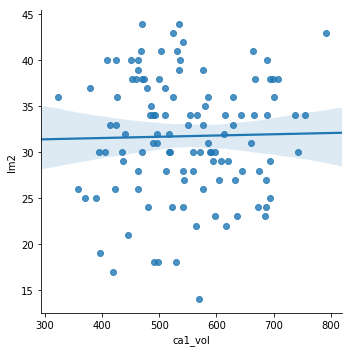

In [63]:
sns.lmplot(x='ca1_vol', y='lm2', data=volumes)

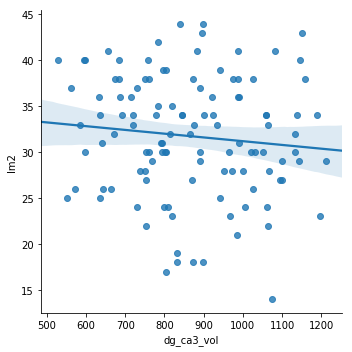

In [62]:
sns.lmplot(x='dg_ca3_vol', y='lm2', data=volumes)

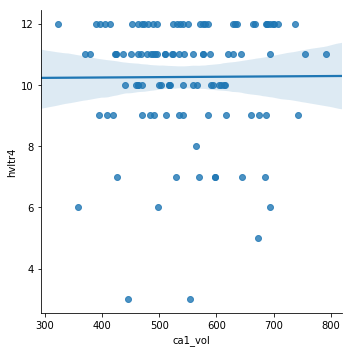

In [61]:
sns.lmplot(x='ca1_vol', y='hvltr4', data=volumes)

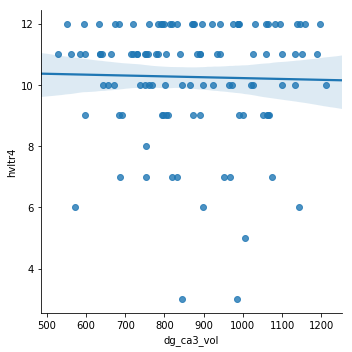

In [60]:
sns.lmplot(x='dg_ca3_vol', y='hvltr4', data=volumes)

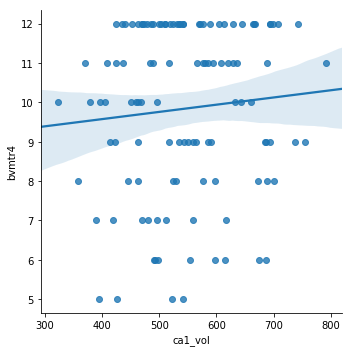

In [58]:
sns.lmplot(x='ca1_vol', y='bvmtr4', data=volumes)

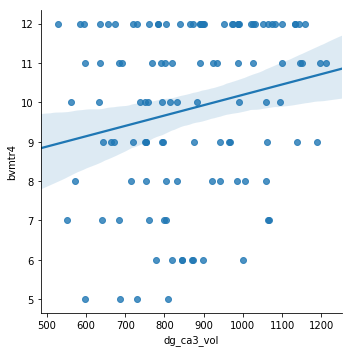

In [59]:
sns.lmplot(x='dg_ca3_vol', y='bvmtr4', data=volumes)

In [68]:
scipy.stats.pearsonr(x=non_nan_volumes['dg_ca3_vol'], y=non_nan_volumes['bvmtr4'])

(0.21085261878607808, 0.025643225605948478)

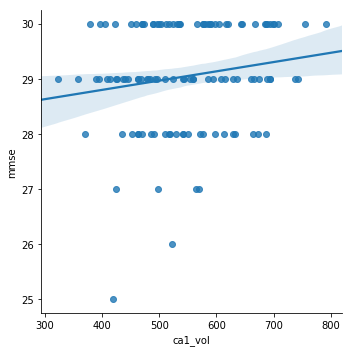

In [66]:
sns.lmplot(x='ca1_vol', y='mmse', data=volumes)

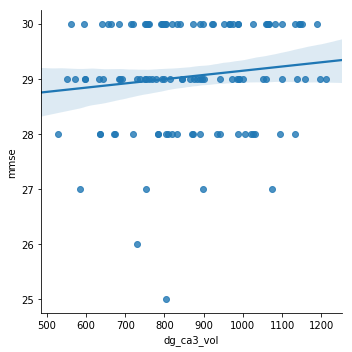

In [67]:
sns.lmplot(x='dg_ca3_vol', y='mmse', data=volumes)

In [8]:
high_low_data = pd.read_csv('/Users/madisonhunt/Downloads/md_data_bysim_05.11.20.csv')
high_low_data = volumes.merge(high_low_data, on = 'pidn')
high_low_data= high_low_data.dropna()
high_low_data.head()

,pidn,r_prc_vol,r_erc_vol,r_phc_vol,r_sub_vol,r_ant_vol,r_ca1_vol,r_dg_ca3_vol,r_post_vol,l_prc_vol,...,dprime_old_lure_5,dprime_old_lure_high,dprime_old_lure_low,dprime_lure_new_1,dprime_lure_new_2,dprime_lure_new_3,dprime_lure_new_4,dprime_lure_new_5,dprime_lure_new_high,dprime_lure_new_low
0,457,1601.589,1279.942,1987.861,577.931,1709.789,260.346,358.206,346.020,1478.248,...,0.983140,0.244995,0.993476,-0.665397,-0.699315,-0.138439,0.639720,0.428938,-0.665397,0.513972
1,472,1473.480,1214.975,1165.490,443.152,1387.435,191.294,425.426,350.459,1544.754,...,1.026215,0.426597,1.086908,-0.193632,0.956718,0.282228,0.852084,1.228598,0.385080,1.057152
2,474,968.635,1087.914,1987.862,515.153,1350.106,227.110,443.511,418.769,972.697,...,1.374680,0.595540,1.030577,0.654371,1.181329,1.181329,1.181329,2.027471,0.901978,1.622102
3,475,1042.850,1208.657,2001.504,435.382,1503.713,278.807,458.647,199.412,1335.690,...,1.029399,0.574404,1.324148,0.536526,0.600885,0.479320,1.453377,1.348744,0.475174,1.400989
4,477,1052.073,1210.862,2684.281,727.847,1650.672,356.353,533.237,584.567,1025.115,...,2.521832,0.906207,2.429473,0.759539,0.910972,0.132813,1.838387,2.295503,0.595540,2.078601


In [9]:
norm_volumes['high_low'] = (high_low_data['dprime_lure_new_high']) - (high_low_data['dprime_lure_new_low'])

In [10]:
norm_volumes.head()

,ca1_vol,dg_ca3_vol,sub_vol,ant_vol,post_vol,hc_vol,brain_vol,np_age,yrs_educ,gender,dprime_bps,bps,dprime_old_new,old_targ_old_foil,high_low
0,-0.291904,-0.388946,1.222244,0.202292,-1.494944,-0.119727,-0.936985,-0.538471,0.580019,1.0,0.000000,0.000000,1.992812,0.671875,-1.179369
1,-1.422972,-0.436679,-0.907711,-1.343750,0.406506,-1.411737,-0.686572,-0.003186,-0.896394,0.0,0.648843,0.208829,2.431774,0.656250,-0.672071
2,-0.766019,0.185141,0.107790,-1.023498,0.367678,-0.673514,0.785576,-0.716899,0.580019,0.0,1.224816,0.109375,2.983332,0.875000,-0.720124
3,-0.549549,0.028517,-0.819774,-0.024296,-1.301267,-0.731476,-0.832214,-0.360042,-0.404256,1.0,0.831929,0.212198,2.393388,0.706455,-0.925814
4,1.996406,1.089635,1.648130,-0.102090,1.963664,1.530471,1.291026,-1.073755,-0.404256,1.0,1.219809,0.359375,3.475528,0.921875,-1.483061


In [11]:
high_low_ca1_controlled_results = smf.ols('high_low ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
high_low_ca1_controlled_results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               high_low   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.174
Date:                Mon, 09 Nov 2020   Prob (F-statistic):             0.0631
Time:                        13:49:23   Log-Likelihood:                -60.557
No. Observations:                 104   AIC:                             133.1
Df Residuals:                      98   BIC:                             149.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5679      0.056    -10.083      0.000      -0.680      -0.456
ca1_vol        0.0088      0.047      0.188      0.852      -0.084       0.102
brain_vol     -0.0373      0.052     -0.724      0.471      -0.140       0.065
np_age         0.0609      0.054      1.123      0.264      -0.047       0.168
yrs_educ      -0.0682      0.046     -1.481      0.142      -0.159       0.023
gender        -0.1732      0.093     -1.857      0.066      -0.358       0.012
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.316
Skew:                           0.077   Prob(JB):                        0.854
Kurtosis:                       2.778   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/madisonhunt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


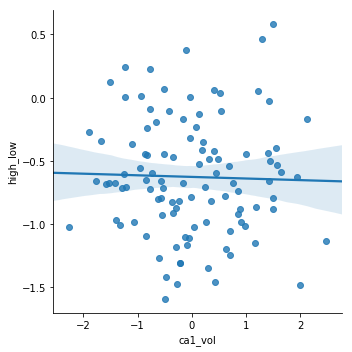

In [12]:
sns.lmplot(x='ca1_vol', y='high_low', data=norm_volumes)

In [13]:
high_low_dg_ca3_controlled_results = smf.ols('high_low ~ dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
high_low_dg_ca3_controlled_results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               high_low   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.725
Date:                Mon, 09 Nov 2020   Prob (F-statistic):             0.0238
Time:                        13:49:24   Log-Likelihood:                -59.256
No. Observations:                 104   AIC:                             130.5
Df Residuals:                      98   BIC:                             146.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5615      0.056    -10.106      0.000      -0.672      -0.451
dg_ca3_vol    -0.0711      0.045     -1.587      0.116      -0.160       0.018
brain_vol     -0.0503      0.051     -0.987      0.326      -0.151       0.051
np_age         0.0353      0.052      0.682      0.497      -0.067       0.138
yrs_educ      -0.0585      0.046     -1.281      0.203      -0.149       0.032
gender        -0.1969      0.092     -2.137      0.035      -0.380      -0.014
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.997
Skew:                           0.215   Prob(JB):                        0.608
Kurtosis:                       2.789   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

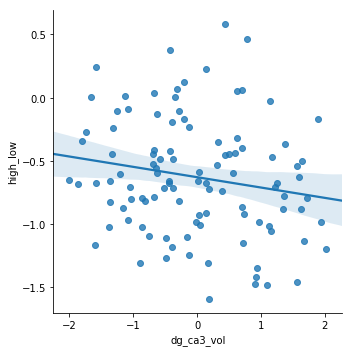

In [14]:
sns.lmplot(x='dg_ca3_vol', y='high_low', data=norm_volumes)

In [15]:
## caluclate and print the mean & SD for age
mean_age = statistics.mean(non_nan_volumes['np_age'])
SD_age = statistics.stdev(non_nan_volumes['np_age'])

print(mean_age, ',', SD_age)

68.01785714285714 , 5.629686664759589


In [16]:
print(min(non_nan_volumes['np_age']))
print(max(non_nan_volumes['np_age']))

60
88


In [17]:
print(len(non_nan_volumes[non_nan_volumes['gender']==1]))

43


In [18]:
print(len(non_nan_volumes[non_nan_volumes['gender']==0]))

69


In [19]:
## caluclate and print the mean & SD for age
mean_ed = statistics.mean(non_nan_volumes['yrs_educ'])
SD_ed = statistics.stdev(non_nan_volumes['yrs_educ'])

print(mean_ed, ',', SD_ed)

16.821428571428573 , 2.0410838214103717


In [20]:
print(min(non_nan_volumes['yrs_educ']))
print(max(non_nan_volumes['yrs_educ']))

10
20


In [21]:
print(volumes[volumes['yrs_educ']==10]['pidn'])

106    1045
Name: pidn, dtype: int64


In [22]:
## caluclate and print the mean & SD for age
mean_mmse = statistics.mean(non_nan_volumes['mmse'])
SD_mmse = statistics.stdev(non_nan_volumes['mmse'])

print(mean_mmse, ',', SD_mmse)

29.053571428571427 , 0.9849249819540674


In [23]:
print(min(non_nan_volumes['mmse']))
print(max(non_nan_volumes['mmse']))

25
30


In [24]:
d_old_new_ca1_controlled_results = smf.ols('dprime_old_new ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_old_new_ca1_controlled_results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         dprime_old_new   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.6018
Date:                Mon, 09 Nov 2020   Prob (F-statistic):              0.699
Time:                        13:49:24   Log-Likelihood:                -96.097
No. Observations:                 107   AIC:                             204.2
Df Residuals:                     101   BIC:                             220.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7384      0.076     36.096      0.000       2.588       2.889
ca1_vol        0.0822      0.064      1.294      0.199      -0.044       0.208
brain_vol      0.0351      0.070      0.501      0.618      -0.104       0.174
np_age         0.0777      0.073      1.058      0.293      -0.068       0.224
yrs_educ       0.0398      0.060      0.665      0.507      -0.079       0.158
gender        -0.0362      0.127     -0.284      0.777      -0.289       0.216
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.177
Skew:                          -0.028   Prob(JB):                        0.915
Kurtosis:                       3.191   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

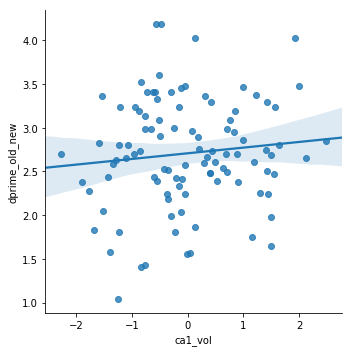

In [25]:
norm_volumes['d_old_new_ca1_vol_residuals'] = pd.DataFrame(d_old_new_ca1_controlled_results.fittedvalues.values)
norm_volumes = norm_volumes.dropna()
sns.lmplot(x='ca1_vol', y = 'dprime_old_new', data=norm_volumes)

In [26]:
scipy.stats.pearsonr(x=norm_volumes['ca1_vol'], y = norm_volumes['dprime_old_new'])

(0.10725637070770581, 0.28816922352159813)

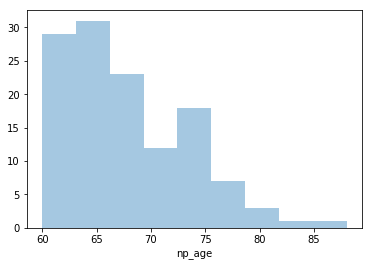

In [27]:
sns.distplot(volumes['np_age'], kde = False)

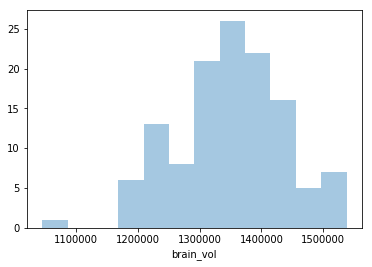

In [28]:
sns.distplot(volumes['brain_vol'], kde = False)

In [29]:
print(volumes[volumes['brain_vol']<1100000]['pidn'])

72    895
Name: pidn, dtype: int64


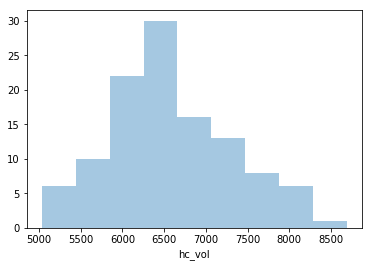

In [30]:
sns.distplot(non_nan_volumes['hc_vol'], kde = False)

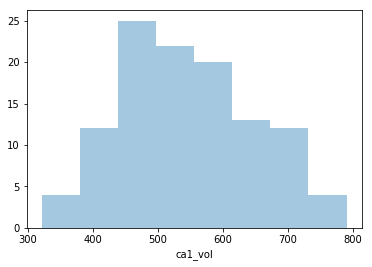

In [31]:
sns.distplot(non_nan_volumes['ca1_vol'], kde = False)

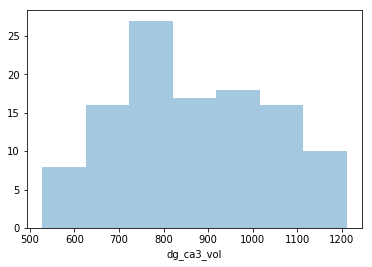

In [32]:
sns.distplot(non_nan_volumes['dg_ca3_vol'], kde = False)

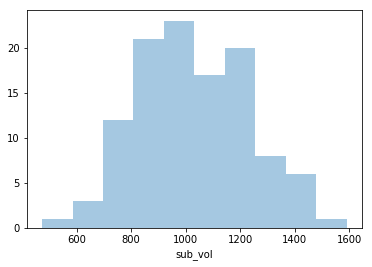

In [33]:
sns.distplot(non_nan_volumes['sub_vol'], kde = False)

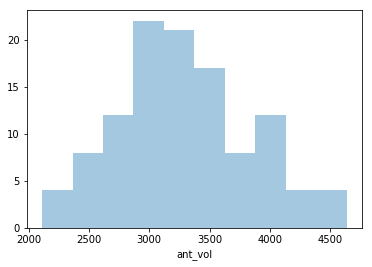

In [34]:
sns.distplot(non_nan_volumes['ant_vol'], kde = False)

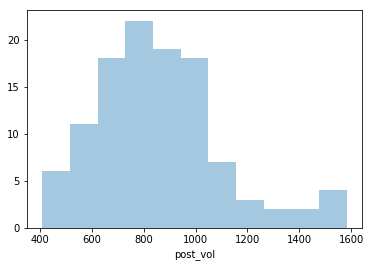

In [35]:
sns.distplot(non_nan_volumes['post_vol'], kde = False)

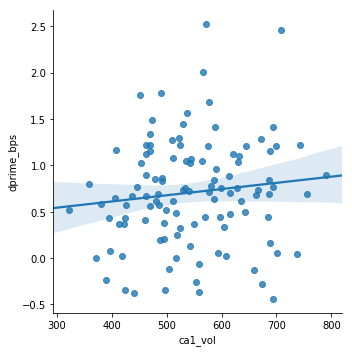

In [36]:
sns.lmplot(x='ca1_vol', y='dprime_bps', data=non_nan_volumes)

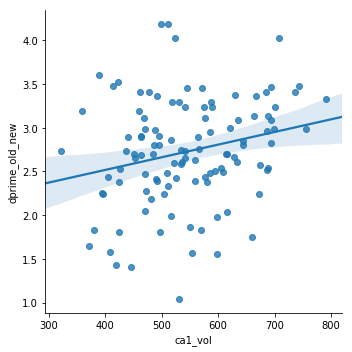

In [37]:
sns.lmplot(x='ca1_vol', y='dprime_old_new', data=non_nan_volumes)

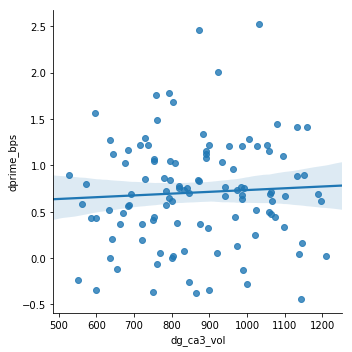

In [38]:
sns.lmplot(x='dg_ca3_vol', y='dprime_bps', data=non_nan_volumes)

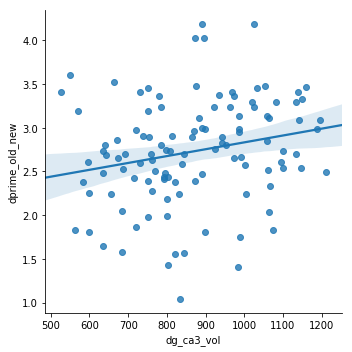

In [39]:
sns.lmplot(x='dg_ca3_vol', y='dprime_old_new', data=non_nan_volumes)

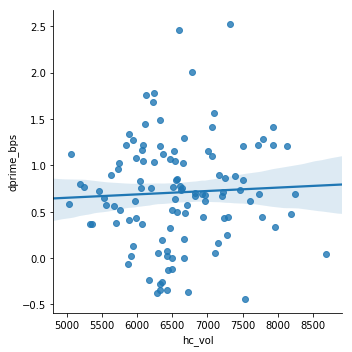

In [40]:
sns.lmplot(x='hc_vol', y='dprime_bps', data=non_nan_volumes)

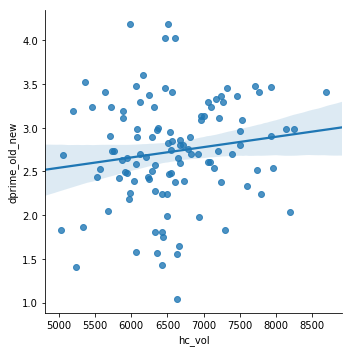

In [41]:
sns.lmplot(x='hc_vol', y='dprime_old_new', data=non_nan_volumes)

In [70]:
scipy.stats.pearsonr(x=non_nan_volumes['hc_vol'], y=non_nan_volumes['dprime_old_new'])

(0.14532789736079252, 0.12629400933794485)

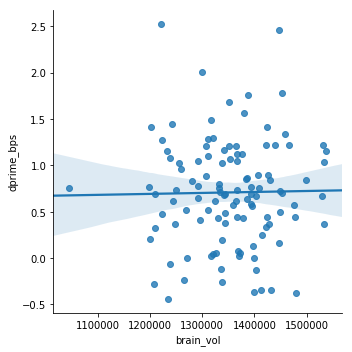

In [42]:
sns.lmplot(x='brain_vol', y='dprime_bps', data=non_nan_volumes)

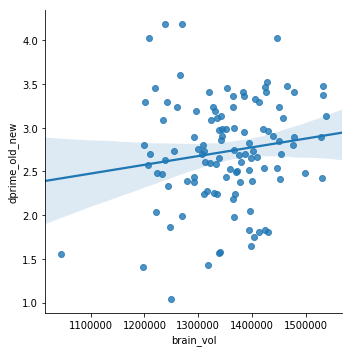

In [43]:
sns.lmplot(x='brain_vol', y='dprime_old_new', data=non_nan_volumes)

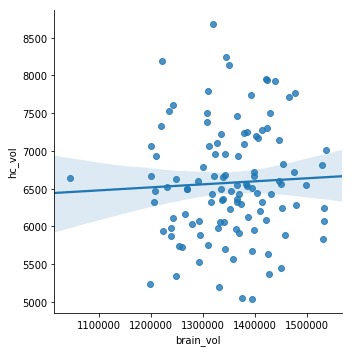

In [44]:
sns.lmplot(x='brain_vol', y='hc_vol', data=non_nan_volumes)

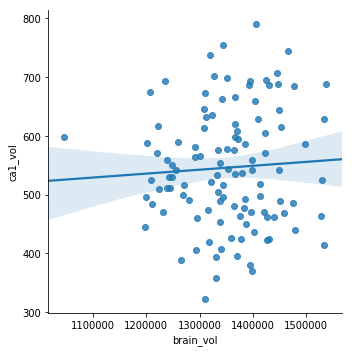

In [45]:
sns.lmplot(x='brain_vol', y='ca1_vol', data=non_nan_volumes)

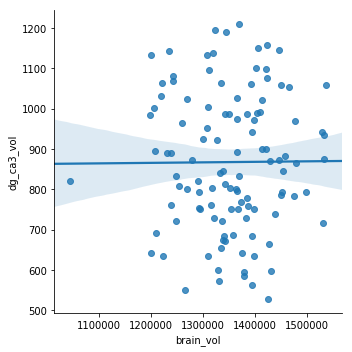

In [46]:
sns.lmplot(x='brain_vol', y='dg_ca3_vol', data=non_nan_volumes)

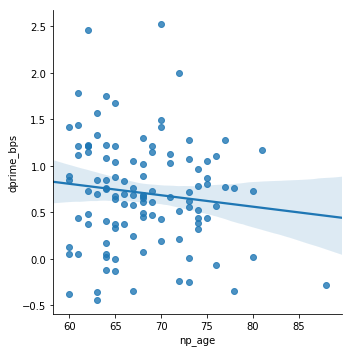

In [47]:
sns.lmplot(x='np_age', y = 'dprime_bps', data = non_nan_volumes)

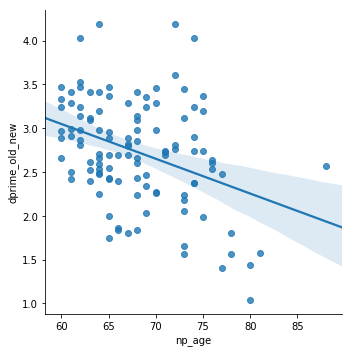

In [48]:
sns.lmplot(x='np_age', y = 'dprime_old_new', data = non_nan_volumes)

Text(3.799999999999997, 0.5, 'CA1 Vol')

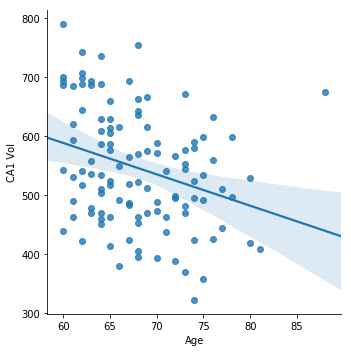

In [49]:
sns.lmplot(x='np_age', y = 'ca1_vol', data = non_nan_volumes)
plt.xlabel('Age')
plt.ylabel('CA1 Vol')

Text(-2.575000000000003, 0.5, 'DG/CA3 Vol')

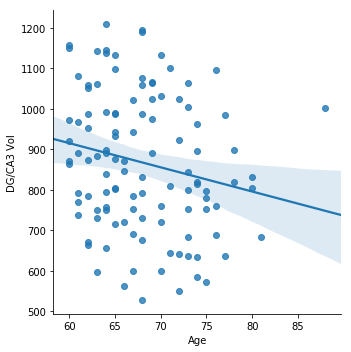

In [50]:
sns.lmplot(x='np_age', y = 'dg_ca3_vol', data = non_nan_volumes)
plt.xlabel('Age')
plt.ylabel('DG/CA3 Vol')

Text(-2.575000000000003, 0.5, 'HC Vol')

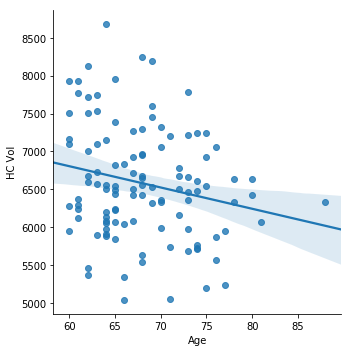

In [51]:
sns.lmplot(x='np_age', y = 'hc_vol', data = non_nan_volumes)
plt.xlabel('Age')
plt.ylabel('HC Vol')

In [52]:
scipy.stats.pearsonr(x=non_nan_volumes['np_age'], y =non_nan_volumes['hc_vol'])

(-0.21287722503073928, 0.024227476008664213)

Text(-2.575000000000003, 0.5, 'Norm HC Vol')

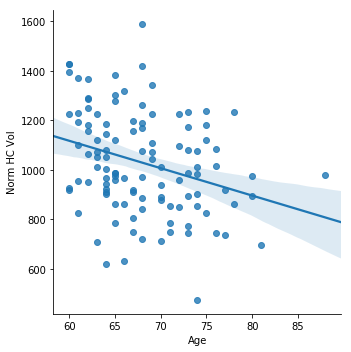

In [53]:
sns.lmplot(x='np_age', y = 'sub_vol', data = non_nan_volumes)
plt.xlabel('Age')
plt.ylabel('Norm HC Vol')